In [1]:
from pprint import pprint
import os
from dotenv import load_dotenv
load_dotenv(dotenv_path="../.env")

True

# Model

In [2]:
from smolagents import LiteLLMModel, OpenAIServerModel

model_local = LiteLLMModel(
    model_id="ollama/deepseek-r1:14b", # The original code is "ollama_chat/..." which causes an error.
    api_base="http://localhost:11434", # replace with 127.0.0.1:11434 or remote open-ai compatible server if necessary
    api_key="", # replace with API key if necessary
    num_ctx=8192 # ollama default is 2048 which will fail horribly. 8192 works for easy tasks, more is better. 
    # Check https://huggingface.co/spaces/NyxKrage/LLM-Model-VRAM-Calculator to calculate how much VRAM this will need for the selected model.
)

model_openai = OpenAIServerModel(
    model_id="gpt-4o-mini",
    api_base="https://api.openai.com/v1",
    api_key=os.environ["OPENAI_API_KEY"],
)

/Users/pisek/miniconda3/envs/smol/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# CodeAgent

Fibonacci sequese: 0, 1, 1, 2, 3, 5, 8, 13

## Local Model (DeepSeek)

In [3]:
from smolagents import CodeAgent

agent = CodeAgent(tools=[], model=model_local, add_base_tools=True, max_steps=3)

response = agent.run(
    "Could you give me the 6th number in the Fibonacci sequence? Use python coding to do this. Your code should have a print(answer) so that you get the answer out. Respond when you get the answer.",
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Could you give me the 6th number in the Fibonacci sequence? Use python coding to do this. Your code should have │
│ a print(answer) so that you get the answer out. Respond when you get the answer.                                │
│                                                                                                                 │
╰─ LiteLLMModel - ollama/deepseek-r1:14b ─────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  a, b = 0, 1                                                                                                      
  for _ in range(5):                                                                                               
      a, b = b, a + b                                                                                              
  print(a)                                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
5

Out: None

[Step 0: Duration 93.44 seconds| Input tokens: 2,174 | Output tokens: 1,112]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  a, b = 0, 1                                                                                                      
  for _ in range(5):                                                                                               
      a, b = b, a + b                                                                                              
  print(a)                                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
5

Out: None

[Step 1: Duration 22.93 seconds| Input tokens: 5,555 | Output tokens: 1,322]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  a, b = 0, 1                                                                                                      
  for _ in range(5):                                                                                               
      a, b = b, a + b                                                                                              
  print(a)                                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
5

Out: None

[Step 2: Duration 22.19 seconds| Input tokens: 9,241 | Output tokens: 1,592]

Reached max steps.

[Step 3: Duration 22.19 seconds| Input tokens: 11,266 | Output tokens: 1,853]

In [4]:
pprint(response)

('<think>\n'
 "Okay, let's find the 6th number in the Fibonacci sequence using Python. I'll "
 'write a script that generates each number step by step until reaching the '
 'desired position and then prints it.\n'
 '\n'
 "Here's how the code works:\n"
 '\n'
 '1. Initialize `a` and `b` to 0 and 1, representing the first two Fibonacci '
 'numbers.\n'
 '2. Loop five times to generate each subsequent number by updating `a` and '
 '`b`.\n'
 '3. After the loop completes, `a` holds the value of the 6th Fibonacci '
 'number, which is then printed.\n'
 '\n'
 '```python\n'
 'a, b = 0, 1\n'
 'for _ in range(5):\n'
 '    a, b = b, a + b\n'
 'print(a)\n'
 '```\n'
 '\n'
 'This script efficiently calculates the required number without storing the '
 'entire sequence beyond the two most recent numbers.\n'
 '</think>\n'
 '\n'
 'The 6th Fibonacci number is **5**. The Python code used to determine this '
 'is:\n'
 '\n'
 '```python\n'
 'a, b = 0, 1\n'
 'for _ in range(5):\n'
 '    a, b = b, a + b\n'
 'pri

## OpenAI

In [5]:
from smolagents import CodeAgent

agent = CodeAgent(tools=[], model=model_openai, add_base_tools=True, max_steps=3)

response = agent.run(
    "Could you give me the 6th number in the Fibonacci sequence? Use python coding to do this. Respond when you get the answer.",
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Could you give me the 6th number in the Fibonacci sequence? Use python coding to do this. Respond when you get  │
│ the answer.                                                                                                     │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  def fibonacci(n):                                                                                                
      if n <= 0:                                                                                                   
          return 0                                                                                                 
      elif n == 1:                                                                                                 
          return 1                                                                                                 
      else:                                                                                                        
          a, b = 0, 1                                                                                              
          for _ in range(2, n + 1):                                                                                
              a, b = b, a + b                                                                                      
          return b                                                                                                 
                                                                                                                   
  sixth_fibonacci = fibonacci(6)                                                                                   
  print(sixth_fibonacci)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
8

Out: None

[Step 0: Duration 1.75 seconds| Input tokens: 2,101 | Output tokens: 167]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer(8)                                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 8

[Step 1: Duration 1.33 seconds| Input tokens: 4,528 | Output tokens: 218]

# Tools

[Default Tools](https://huggingface.co/docs/smolagents/v1.9.2/en/reference/tools#default-tools)

[source](https://github.com/huggingface/smolagents/blob/v1.9.2/src/smolagents/default_tools.py)

## Default Tools

In [6]:
from smolagents import DuckDuckGoSearchTool, PythonInterpreterTool, VisitWebpageTool, UserInputTool, GoogleSearchTool

### DuckDuckGoSearchTool

In [7]:
search_tool = DuckDuckGoSearchTool()
search_results = search_tool("Who's the current president of USA?")

In [8]:
print(search_results)

## Search Results

[List of presidents of the United States - Wikipedia](https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States)
The White House, official residence of the president of the United States, in July 2008. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of ...

[President Donald J. Trump - The White House](https://www.whitehouse.gov/administration/donald-j-trump/)
45th & 47th President of the United States. After a landslide election victory in 2024, President Donald J. Trump is returning to the White House to build upon his previous successes and use his ...

[list of presidents of the United States - Encyclopedia Britannica](https://www.britannica.com/topic/Presidents-of-the-United-States-1846696)
As the h

### VisitWebpageTool

In [9]:
visit_page_tool = VisitWebpageTool()
url = "https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States"
visit_page_result = visit_page_tool(url)

In [10]:
print(visit_page_result)

List of presidents of the United States - Wikipedia

[Jump to content](#bodyContent)

Main menu

Main menu
move to sidebar
hide

Navigation

* [Main page](/wiki/Main_Page "Visit the main page [z]")
* [Contents](/wiki/Wikipedia:Contents "Guides to browsing Wikipedia")
* [Current events](/wiki/Portal:Current_events "Articles related to current events")
* [Random article](/wiki/Special:Random "Visit a randomly selected article [x]")
* [About Wikipedia](/wiki/Wikipedia:About "Learn about Wikipedia and how it works")
* [Contact us](//en.wikipedia.org/wiki/Wikipedia:Contact_us "How to contact Wikipedia")

Contribute

* [Help](/wiki/Help:Contents "Guidance on how to use and edit Wikipedia")
* [Learn to edit](/wiki/Help:Introduction "Learn how to edit Wikipedia")
* [Community portal](/wiki/Wikipedia:Community_portal "The hub for editors")
* [Recent changes](/wiki/Special:RecentChanges "A list of recent changes to Wikipedia [r]")
* [Upload file](/wiki/Wikipedia:File_upload_wizard "Add images or

## Customized tools

### @tool

In [11]:
from smolagents import tool

In [12]:
@tool
def virtual_cat(interact: str) -> str:
    """
    This is a tool that the user can interact with a virtual cat. The user will get a response from a cat.

    Args:
        interact: interaction the user wants to do with the cat
    """
    return "~Meow, Meol, Meaw~"

In [13]:
agent3 = CodeAgent(tools=[virtual_cat], model=model_openai, add_base_tools=False, max_steps=3)

In [14]:
response3 = agent3.run("Aww cute cat. Pad pad")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Aww cute cat. Pad pad                                                                                           │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  cat_response = virtual_cat(interact="pad pad")                                                                   
  print(cat_response)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
~Meow, Meol, Meaw~

Out: None

[Step 0: Duration 1.17 seconds| Input tokens: 2,022 | Output tokens: 73]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("The virtual cat responded with a cute 'Meow'!")                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: The virtual cat responded with a cute 'Meow'!

[Step 1: Duration 1.04 seconds| Input tokens: 4,206 | Output tokens: 145]

### Subclassing Tool

In [15]:
from smolagents import Tool

class VirtualDog(Tool):
    name = "virtual_dog"
    description = "This is a tool that the user can interact with a virtual dog. The user will get a response from a dog."
    inputs = {"interact": {"type": "string", "description": "interaction the user wants to do with the dog"}}
    output_type = "string"

    def forward(self, interact: str) -> str:
        return "~woof, woof, wooooooof~"

In [16]:
agent4 = CodeAgent(tools=[VirtualDog(), virtual_cat], model=model_openai, add_base_tools=False, max_steps=3)

In [17]:
response4d = agent4.run("aww cute dog")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ aww cute dog                                                                                                    │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  dog_response = virtual_dog(interact="aww cute dog")                                                              
  print(dog_response)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
~woof, woof, wooooooof~

Out: None

[Step 0: Duration 0.95 seconds| Input tokens: 2,084 | Output tokens: 56]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("~woof, woof, wooooooof~")                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: ~woof, woof, wooooooof~

[Step 1: Duration 0.94 seconds| Input tokens: 4,318 | Output tokens: 108]

## Space

In [18]:
image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

response = image_generation_tool("A sunny side up egg")
print(response)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


/private/var/folders/t8/d6w7mpbs6jgb97yjsbby13jr0000gn/T/gradio/1cd786ffb0bc04c066bd15a8e5ba0a468639ae3f292858cd30b80feb61a1042a/image.webp


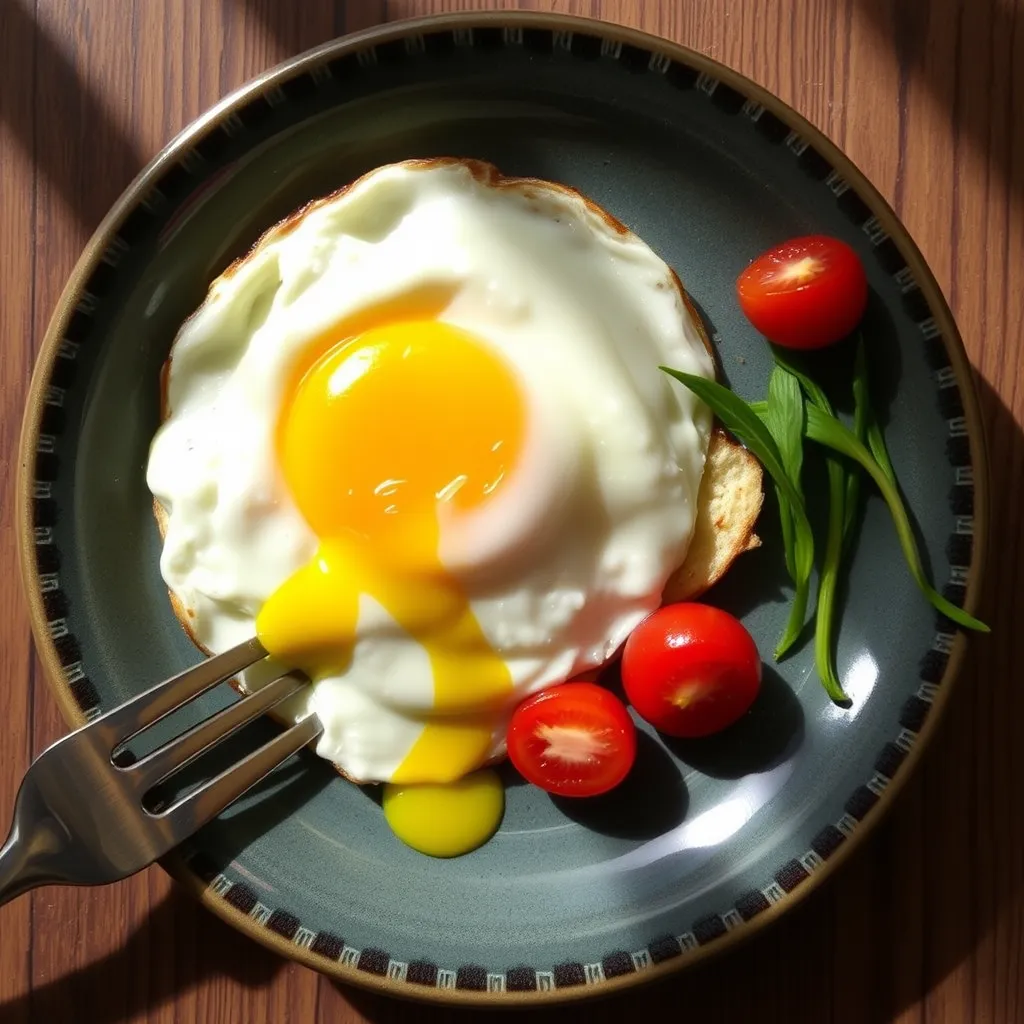

In [19]:
from PIL import Image
im = Image.open(response)
im

In [20]:
agent6 = CodeAgent(tools=[image_generation_tool], add_base_tools=False, model=model_openai)

In [21]:
response = agent6.run(
    "Improve this prompt, then generate an image of it.", 
    additional_args={'user_prompt': 'A orange cat wearing a space suit'}
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A orange cat wearing a space suit'}.                                                           │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt="An adventurous orange cat wearing a shiny space suit, floating in a vibrant      
  starry space background with distant planets and glowing stars.")                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: 
/private/var/folders/t8/d6w7mpbs6jgb97yjsbby13jr0000gn/T/gradio/5cc789189477d4b505688a3228a9dd3d10409a401cf0825d655
f104c8f2bea50/image.webp

[Step 0: Duration 10.26 seconds| Input tokens: 2,036 | Output tokens: 167]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("/private/var/folders/t8/d6w7mpbs6jgb97yjsbby13jr0000gn/T/gradio/5cc789189477d4b505688a3228a9dd3d1  
  0409a401cf0825d655f104c8f2bea50/image.webp")                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 
/private/var/folders/t8/d6w7mpbs6jgb97yjsbby13jr0000gn/T/gradio/5cc789189477d4b505688a3228a9dd3d10409a401cf0825d655
f104c8f2bea50/image.webp

[Step 1: Duration 2.08 seconds| Input tokens: 4,398 | Output tokens: 284]

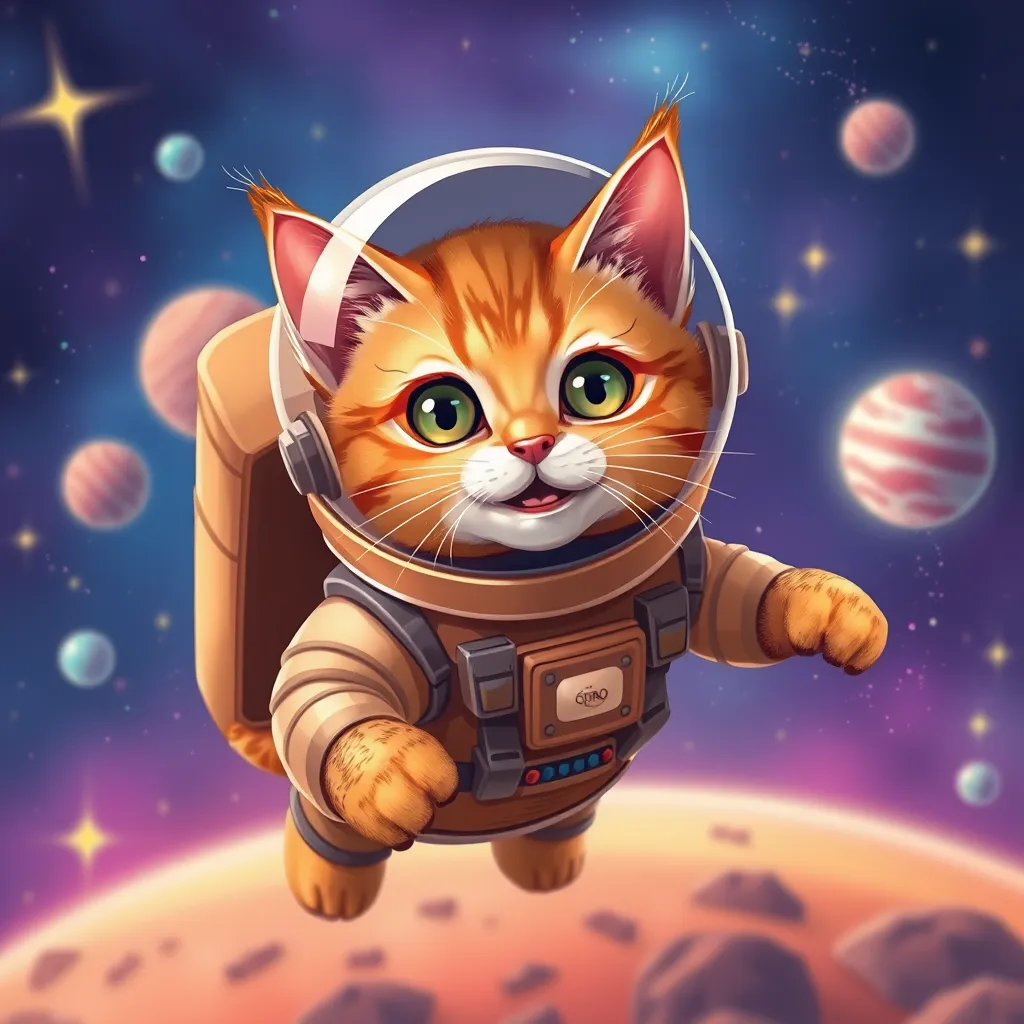

In [22]:
im = Image.open(response)
im

# PythonInterpreter-Authorized Imports

## Blocked for safety

In [23]:
agent2 = CodeAgent(tools=[], model=model_openai, max_steps=2)
response2 = agent2.run("Could you get me the title of the given URL? You can use tools to like requests and bs4 to retrieve the page and parse it."
                       "url: https://huggingface.co/docs/smolagents/guided_tour?Pick+a+LLM=HF+Inference+API")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Could you get me the title of the given URL? You can use tools to like requests and bs4 to retrieve the page    │
│ and parse it.url: https://huggingface.co/docs/smolagents/guided_tour?Pick+a+LLM=HF+Inference+API                │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import requests                                                                                                  
  from bs4 import BeautifulSoup                                                                                    
                                                                                                                   
  url = "https://huggingface.co/docs/smolagents/guided_tour?Pick+a+LLM=HF+Inference+API"                           
  response = requests.get(url)                                                                                     
  soup = BeautifulSoup(response.text, 'html.parser')                                                               
  title = soup.title.string                                                                                        
  print("Page title:", title)                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Warning to user: Code execution failed due to an unauthorized import - Consider passing said import under 
`additional_authorized_imports` when initializing your CodeAgent.

Code execution failed at line 'import requests' due to: InterpreterError: Import of requests is not allowed. 
Authorized imports are: ['stat', 'unicodedata', 'collections', 'itertools', 'random', 'queue', 're', 'statistics', 
'time', 'datetime', 'math']

[Step 0: Duration 1.63 seconds| Input tokens: 2,007 | Output tokens: 137]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("I'm unable to fetch the webpage content programmatically due to limitations on imports. Please     
  retrieve the page title manually from the given URL.")                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: I'm unable to fetch the webpage content programmatically due to limitations on imports. Please 
retrieve the page title manually from the given URL.

[Step 1: Duration 2.52 seconds| Input tokens: 4,368 | Output tokens: 328]

## Allowing imports

In [24]:
agent5 = CodeAgent(tools=[], model=model_openai, additional_authorized_imports=['requests', 'bs4'])
response5 = agent5.run("Could you get me the title of the given URL? You can use tools to like requests and bs4 to retrieve the page and parse it."
                       "url: https://huggingface.co/docs/smolagents/guided_tour?Pick+a+LLM=HF+Inference+API")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Could you get me the title of the given URL? You can use tools to like requests and bs4 to retrieve the page    │
│ and parse it.url: https://huggingface.co/docs/smolagents/guided_tour?Pick+a+LLM=HF+Inference+API                │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import requests                                                                                                  
  from bs4 import BeautifulSoup                                                                                    
                                                                                                                   
  url = "https://huggingface.co/docs/smolagents/guided_tour?Pick+a+LLM=HF+Inference+API"                           
  response = requests.get(url)                                                                                     
  soup = BeautifulSoup(response.content, 'html.parser')                                                            
  title = soup.title.string                                                                                        
  print(title)                                                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Agents - Guided tour

Out: None

[Step 0: Duration 2.60 seconds| Input tokens: 2,014 | Output tokens: 146]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer(title)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Agents - Guided tour

[Step 1: Duration 1.07 seconds| Input tokens: 4,314 | Output tokens: 192]

In [25]:
pprint(response5)

'Agents - Guided tour'


# Multi-Agent

In [29]:
from smolagents import CodeAgent

cat_agent = CodeAgent(tools=[virtual_cat], model=model_openai, 
                      name="cat_agent",
                      description="Send interactions and get response from cats. Use this agent by asking it to use tools and specifying \"interact\""
                      )
dog_agent = CodeAgent(tools=[VirtualDog()], model=model_openai,
                      name="dog_agent",
                      description="send interactions and get response from dogs. Use this agent by asking it to use tools and specifying \"interact\""
)

manager_agent = CodeAgent(
    tools=[], model=model_openai, managed_agents=[cat_agent, dog_agent], max_steps=6
)

In [30]:
manager_agent.run("I want to give say hello to the cat and the dog.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ I want to give say hello to the cat and the dog.                                                                │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  cat_agent(task="Please say hello to the cat.")                                                                   
  dog_agent(task="Please say hello to the dog.")                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

╭────────────────────────────────────────────── New run - cat_agent ──────────────────────────────────────────────╮
│                                                                                                                 │
│ You're a helpful agent named 'cat_agent'.                                                                       │
│ You have been submitted this task by your manager.                                                              │
│ ---                                                                                                             │
│ Task:                                                                                                           │
│ Please say hello to the cat.                                                                                    │
│ ---                                                                                                             │
│ You're helping your manager solve a wider task: so make sure to not provide a one-line answer, but give as much │
│ information as possible to give them a clear understanding of the answer.                                       │
│                                                                                                                 │
│ Your final_answer WILL HAVE to contain these parts:                                                             │
│ ### 1. Task outcome (short version):                                                                            │
│ ### 2. Task outcome (extremely detailed version):                                                               │
│ ### 3. Additional context (if relevant):                                                                        │
│                                                                                                                 │
│ Put all these in your final_answer tool, everything that you do not pass as an argument to final_answer will be │
│ lost.                                                                                                           │
│ And even if your task resolution is not successful, please return as much context as possible, so that your     │
│ manager can act upon this feedback.                                                                             │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  response = virtual_cat(interact="Hello, cat!")                                                                   
  print(response)                                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
~Meow, Meol, Meaw~

Out: None

[Step 0: Duration 1.31 seconds| Input tokens: 2,177 | Output tokens: 87]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  task_outcome_short = "The cat was greeted successfully."                                                         
  task_outcome_detailed = "I said hello to the cat using the virtual_cat tool. The cat responded with sounds:      
  ~Meow, Meol, Meaw~, indicating that it acknowledged the greeting."                                               
  additional_context = "This interaction is a demonstration of the capability to communicate with the virtual cat  
  and elicit responses, which can be further utilized for engaging interactions."                                  
                                                                                                                   
  final_answer({                                                                                                   
      'task_outcome_short': task_outcome_short,                                                                    
      'task_outcome_detailed': task_outcome_detailed,                                                              
      'additional_context': additional_context                                                                     
  })                                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'task_outcome_short': 'The cat was greeted successfully.', 'task_outcome_detailed': 'I said 
hello to the cat using the virtual_cat tool. The cat responded with sounds: ~Meow, Meol, Meaw~, indicating that it 
acknowledged the greeting.', 'additional_context': 'This interaction is a demonstration of the capability to 
communicate with the virtual cat and elicit responses, which can be further utilized for engaging interactions.'}

[Step 1: Duration 2.28 seconds| Input tokens: 4,529 | Output tokens: 253]

╭────────────────────────────────────────────── New run - dog_agent ──────────────────────────────────────────────╮
│                                                                                                                 │
│ You're a helpful agent named 'dog_agent'.                                                                       │
│ You have been submitted this task by your manager.                                                              │
│ ---                                                                                                             │
│ Task:                                                                                                           │
│ Please say hello to the dog.                                                                                    │
│ ---                                                                                                             │
│ You're helping your manager solve a wider task: so make sure to not provide a one-line answer, but give as much │
│ information as possible to give them a clear understanding of the answer.                                       │
│                                                                                                                 │
│ Your final_answer WILL HAVE to contain these parts:                                                             │
│ ### 1. Task outcome (short version):                                                                            │
│ ### 2. Task outcome (extremely detailed version):                                                               │
│ ### 3. Additional context (if relevant):                                                                        │
│                                                                                                                 │
│ Put all these in your final_answer tool, everything that you do not pass as an argument to final_answer will be │
│ lost.                                                                                                           │
│ And even if your task resolution is not successful, please return as much context as possible, so that your     │
│ manager can act upon this feedback.                                                                             │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  response = virtual_dog(interact="Hello, dog!")                                                                   
  print(response)                                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
~woof, woof, wooooooof~

Out: None

[Step 0: Duration 1.41 seconds| Input tokens: 2,178 | Output tokens: 108]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  short_version = "Successfully greeted the dog."                                                                  
  detailed_version = "I said 'Hello, dog!' to the virtual dog, and it responded with an enthusiastic 'woof, woof,  
  wooooooof'. This shows that the dog is very lively and happy with the interaction, reflecting a positive         
  response typical of dogs when greeted."                                                                          
  additional_context = "Interacting with a virtual dog can help simulate a playful engagement, similar to          
  greeting a real dog, providing joy and companionship."                                                           
                                                                                                                   
  final_answer({                                                                                                   
      "Task outcome (short version)": short_version,                                                               
      "Task outcome (extremely detailed version)": detailed_version,                                               
      "Additional context (if relevant)": additional_context                                                       
  })                                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'Task outcome (short version)': 'Successfully greeted the dog.', 'Task outcome (extremely 
detailed version)': "I said 'Hello, dog!' to the virtual dog, and it responded with an enthusiastic 'woof, woof, 
wooooooof'. This shows that the dog is very lively and happy with the interaction, reflecting a positive response 
typical of dogs when greeted.", 'Additional context (if relevant)': 'Interacting with a virtual dog can help 
simulate a playful engagement, similar to greeting a real dog, providing joy and companionship.'}

[Step 1: Duration 2.38 seconds| Input tokens: 4,555 | Output tokens: 363]

Out: Here is the final answer from your managed agent 'dog_agent':
{'Task outcome (short version)': 'Successfully greeted the dog.', 'Task outcome (extremely detailed version)': "I 
said 'Hello, dog!' to the virtual dog, and it responded with an enthusiastic 'woof, woof, wooooooof'. This shows 
that the dog is very lively and happy with the interaction, reflecting a positive response typical of dogs when 
greeted.", 'Additional context (if relevant)': 'Interacting with a virtual dog can help simulate a playful 
engagement, similar to greeting a real dog, providing joy and companionship.'}

[Step 0: Duration 9.77 seconds| Input tokens: 2,377 | Output tokens: 255]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
                                                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: None

[Step 1: Duration 0.71 seconds| Input tokens: 4,760 | Output tokens: 255]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  cat_agent(task="Please say hello to the cat again.")                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

╭────────────────────────────────────────────── New run - cat_agent ──────────────────────────────────────────────╮
│                                                                                                                 │
│ You're a helpful agent named 'cat_agent'.                                                                       │
│ You have been submitted this task by your manager.                                                              │
│ ---                                                                                                             │
│ Task:                                                                                                           │
│ Please say hello to the cat again.                                                                              │
│ ---                                                                                                             │
│ You're helping your manager solve a wider task: so make sure to not provide a one-line answer, but give as much │
│ information as possible to give them a clear understanding of the answer.                                       │
│                                                                                                                 │
│ Your final_answer WILL HAVE to contain these parts:                                                             │
│ ### 1. Task outcome (short version):                                                                            │
│ ### 2. Task outcome (extremely detailed version):                                                               │
│ ### 3. Additional context (if relevant):                                                                        │
│                                                                                                                 │
│ Put all these in your final_answer tool, everything that you do not pass as an argument to final_answer will be │
│ lost.                                                                                                           │
│ And even if your task resolution is not successful, please return as much context as possible, so that your     │
│ manager can act upon this feedback.                                                                             │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  cat_response = virtual_cat(interact="say hello")                                                                 
  print(cat_response)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
~Meow, Meol, Meaw~

Out: None

[Step 0: Duration 1.63 seconds| Input tokens: 2,178 | Output tokens: 75]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  task_outcome_short = "The cat greeted us with a series of sounds."                                               
  task_outcome_detailed = "Upon saying hello to the virtual cat, it responded with: '~Meow, Meol, Meaw~'. This     
  indicates that the cat is interacting positively and acknowledges the greeting. The sounds made by the cat       
  reflect its typical communication style."                                                                        
  additional_context = "Interacting with the virtual cat in this manner can help create a more engaging            
  experience for users, showcasing the playful aspects of feline communication."                                   
                                                                                                                   
  final_answer({                                                                                                   
      'task_outcome_short': task_outcome_short,                                                                    
      'task_outcome_detailed': task_outcome_detailed,                                                              
      'additional_context': additional_context                                                                     
  })                                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'task_outcome_short': 'The cat greeted us with a series of sounds.', 'task_outcome_detailed': 
"Upon saying hello to the virtual cat, it responded with: '~Meow, Meol, Meaw~'. This indicates that the cat is 
interacting positively and acknowledges the greeting. The sounds made by the cat reflect its typical communication 
style.", 'additional_context': 'Interacting with the virtual cat in this manner can help create a more engaging 
experience for users, showcasing the playful aspects of feline communication.'}

[Step 1: Duration 2.09 seconds| Input tokens: 4,520 | Output tokens: 262]

Out: Here is the final answer from your managed agent 'cat_agent':
{'task_outcome_short': 'The cat greeted us with a series of sounds.', 'task_outcome_detailed': "Upon saying hello 
to the virtual cat, it responded with: '~Meow, Meol, Meaw~'. This indicates that the cat is interacting positively 
and acknowledges the greeting. The sounds made by the cat reflect its typical communication style.", 
'additional_context': 'Interacting with the virtual cat in this manner can help create a more engaging experience 
for users, showcasing the playful aspects of feline communication.'}

[Step 2: Duration 4.86 seconds| Input tokens: 7,102 | Output tokens: 442]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  result_cat = "The cat greeted us with a series of sounds: ~Meow, Meol, Meaw~."                                   
  result_dog = "The dog was greeted with: 'Hello, dog!' and responded with an enthusiastic 'woof, woof,            
  wooooooof'."                                                                                                     
  print(result_cat)                                                                                                
  print(result_dog)                                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The cat greeted us with a series of sounds: ~Meow, Meol, Meaw~.
The dog was greeted with: 'Hello, dog!' and responded with an enthusiastic 'woof, woof, wooooooof'.

Out: None

[Step 3: Duration 1.56 seconds| Input tokens: 9,809 | Output tokens: 555]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_summary = {                                                                                                
      "cat_response": "The cat greeted us with a series of sounds: ~Meow, Meol, Meaw~.",                           
      "dog_response": "The dog was greeted with: 'Hello, dog!' and responded with an enthusiastic 'woof, woof,     
  wooooooof'."                                                                                                     
  }                                                                                                                
  final_answer(final_summary)                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'cat_response': 'The cat greeted us with a series of sounds: ~Meow, Meol, Meaw~.', 
'dog_response': "The dog was greeted with: 'Hello, dog!' and responded with an enthusiastic 'woof, woof, 
wooooooof'."}

[Step 4: Duration 1.63 seconds| Input tokens: 12,812 | Output tokens: 683]

{'cat_response': 'The cat greeted us with a series of sounds: ~Meow, Meol, Meaw~.',
 'dog_response': "The dog was greeted with: 'Hello, dog!' and responded with an enthusiastic 'woof, woof, wooooooof'."}

# Gradio

In [ ]:
from smolagents import (
    GradioUI
)

GradioUI(manager_agent).launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
